In [1]:
import json

import requests
import tweepy
import pandas as pd
import numpy as np

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)

In [3]:
# def get_data():
#     auth = tweepy.OAuthHandler(consumer_key=api_key, consumer_secret=api_key_secret)
#     auth.set_access_token(key=access_token, secret=access_token_secret)
#     api = tweepy.API(auth, wait_on_rate_limit=True)

#     df = pd.read_csv('twitter-archive-enhanced.csv')

#     data: list[dict] = []
#     deleted_tweets: list[tuple] = []
#     for idx, tweet_id in enumerate(df['tweet_id']):
#         try:
#             status = api.get_status(tweet_id)
#         except tweepy.errors.TweepyException as ex:
#             deleted_tweets.append((repr(ex), tweet_id))
#         else:
#             d = {'tweet_id': tweet_id, 'favorite_count': status.favorite_count, 'retweet_count': status.retweet_count}
#             data.append(d)
#             print(f'{idx=}, {d}')

#     with open('like-and-retweet-count.json', mode='w', encoding='utf-8') as f:
#         json.dump(data, f)


# get_data()

In [4]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df2 = pd.read_json('like-and-retweet-count.json')
df3 = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df2.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,32989,6898
1,892177421306343426,28523,5201
2,891815181378084864,21445,3433
3,891689557279858688,35948,7108
4,891327558926688256,34376,7637


In [9]:
df2.describe()

,tweet_id,favorite_count,retweet_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417346e+17,6888.992261,2432.109200
std,6.816442e+16,10703.379960,4116.625771
min,6.660209e+17,0.000000,0.000000
25%,6.780814e+17,1196.000000,488.250000
50%,7.178159e+17,2984.500000,1130.500000
75%,7.986402e+17,8415.500000,2815.500000
max,8.924206e+17,142094.000000,69561.000000


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   favorite_count  2326 non-null   int64
 2   retweet_count   2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [11]:
df3.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df3.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# set the 'key' as index so we can join them easily
df1 = df1.set_index('tweet_id').copy()
df2 = df2.set_index('tweet_id').copy()
df3 = df3.set_index('tweet_id').copy()
df1

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [15]:
df_og = df1.join(df2, how='left')

In [16]:
# make a copy before staring to clean...
df = df_og.copy()

In [17]:
df.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
tweet_id,,,,,,,,,,,,,,,,,,
666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None,390.0,180.0
818614493328580609,NaN,NaN,2017-01-10 00:24:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bear. He's a passionate believer of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818614493...,12,10,Bear,None,None,None,None,9090.0,2323.0
811744202451197953,NaN,NaN,2016-12-22 01:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Halo. She likes watermelon. 13/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811744202...,13,10,Halo,None,None,None,None,7012.0,1451.0
683098815881154561,NaN,NaN,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683098815...,12,10,None,None,None,None,None,1962.0,584.0
858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None,13808.0,2987.0


# Data Issues:

Quality Issues:
- [x] Remove retweets 
- [x] Remove replies
- [x] keep only original tweets with image  #and remove videos
- [x] Keep only records with a rating
- [x] favorite_count column should be integer, not float
- [x] retweet_count column should be integer, not float
- [x] time_stamp column should be datetime, not object
- [x] convert `'None'` in string columns to `None/np.nan`

Tidiness Issues:
- [x] ['doggo', 'floofer', 'pupper', 'puppo'] columns should all be in the same (Categorical) column
- [x] source column contains two variables (url and device name)

## Visual assesment:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

In [19]:
df.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2326.000000,2326.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,6888.992261,2432.109200
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,10703.379960,4116.625771
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1196.000000,488.250000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,2984.500000,1130.500000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,8415.500000,2815.500000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,142094.000000,69561.000000


---

---

## Playground:

In [20]:
df.duplicated().sum()  # no duplicates

0

In [21]:
df.rating_denominator.isna().any(), df.rating_numerator.isna().any() # all the records contain a rating

(False, False)

---

# Breed Prediction

This dataframe contains the top 3 breed predictions for some of the iamges, were going to clean it and then pick the first prediction that is a dog and join it to the main dataframe

In [22]:
df3.sample(5)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True
769212283578875904,https://pbs.twimg.com/media/CqzKfQgXEAAWIY-.jpg,1,golden_retriever,0.166538,True,Pekinese,0.148215,True,cocker_spaniel,0.082735,True
748692773788876800,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1,ox,0.337871,False,plow,0.269287,False,oxcart,0.245653,False
695051054296211456,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True
768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,Brabancon_griffon,0.058365,True,Rottweiler,0.055113,True


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jpg_url  2075 non-null   object 
 1   img_num  2075 non-null   int64  
 2   p1       2075 non-null   object 
 3   p1_conf  2075 non-null   float64
 4   p1_dog   2075 non-null   bool   
 5   p2       2075 non-null   object 
 6   p2_conf  2075 non-null   float64
 7   p2_dog   2075 non-null   bool   
 8   p3       2075 non-null   object 
 9   p3_conf  2075 non-null   float64
 10  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [24]:
df3.describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
df3.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [26]:
df.shape

(2356, 18)

In [27]:
df.timestamp.isna().sum()

0

In [28]:
col = df3.p1.value_counts()
# dict(df3.p1.value_counts())
dict(col[col < 30])

{'French_bulldog': 26,
 'miniature_pinscher': 23,
 'Chesapeake_Bay_retriever': 23,
 'seat_belt': 22,
 'Siberian_husky': 20,
 'German_shepherd': 20,
 'Staffordshire_bullterrier': 20,
 'Cardigan': 19,
 'web_site': 19,
 'Eskimo_dog': 18,
 'Maltese_dog': 18,
 'Shetland_sheepdog': 18,
 'teddy': 18,
 'beagle': 18,
 'Lakeland_terrier': 17,
 'Rottweiler': 17,
 'Shih-Tzu': 17,
 'Italian_greyhound': 16,
 'kuvasz': 16,
 'West_Highland_white_terrier': 14,
 'Great_Pyrenees': 14,
 'American_Staffordshire_terrier': 13,
 'basset': 13,
 'Pekinese': 13,
 'dalmatian': 13,
 'vizsla': 13,
 'Airedale': 12,
 'Border_collie': 12,
 'Old_English_sheepdog': 12,
 'kelpie': 11,
 'Blenheim_spaniel': 11,
 'soft-coated_wheaten_terrier': 11,
 'schipperke': 10,
 'Bernese_mountain_dog': 10,
 'English_springer': 10,
 'collie': 10,
 'boxer': 10,
 'whippet': 9,
 'dingo': 9,
 'malinois': 9,
 'Great_Dane': 9,
 'borzoi': 9,
 'tennis_ball': 9,
 'Boston_bull': 9,
 'flat-coated_retriever': 8,
 'standard_poodle': 8,
 'Yorkshire_t

In [29]:
df3

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...
891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [30]:
def func(ser: pd.Series):
    """
    Loop through each value in a row and return the first prediction that is a dog,
    if all three predictions are not dogs then return np.nan
    """
    for i in range(1, 4):
        if ser[f'p{i}_dog'] is True:
            return ser[f'p{i}']
    else:
        return np.nan


df3['final_prediction'] = df3[['p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog']].apply(func, axis=1, result_type='reduce')

In [31]:
# clean the column values:

df3.final_prediction = df3.final_prediction.str.replace('_', ' ').str.title()
df3.final_prediction

tweet_id
666020888022790149    Welsh Springer Spaniel
666029285002620928                   Redbone
666033412701032449           German Shepherd
666044226329800704       Rhodesian Ridgeback
666049248165822465        Miniature Pinscher
                               ...          
891327558926688256                    Basset
891689557279858688        Labrador Retriever
891815181378084864                 Chihuahua
892177421306343426                 Chihuahua
892420643555336193                       NaN
Name: final_prediction, Length: 2075, dtype: object

In [32]:
(df3.columns)

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'final_prediction'],
      dtype='object')

In [33]:
df3.final_prediction[df3.final_prediction.isna()].value_counts()

Series([], Name: final_prediction, dtype: int64)

In [34]:
df3

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,final_prediction
tweet_id,,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh Springer Spaniel
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German Shepherd
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian Ridgeback
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher
...,...,...,...,...,...,...,...,...,...,...,...,...
891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Basset
891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador Retriever
891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua


In [35]:
# now we will join the final prediction to the main DataFrame:

df = df.join(df3[['final_prediction']], how='left')
df

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,final_prediction
tweet_id,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,32989.0,6898.0,NaN
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,28523.0,5201.0,Chihuahua
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,21445.0,3433.0,Chihuahua
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,35948.0,7108.0,Labrador Retriever
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,34376.0,7637.0,Basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,87.0,36.0,Miniature Pinscher
666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,244.0,113.0,Rhodesian Ridgeback
666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,98.0,35.0,German Shepherd


---

## Remove Retweets

#### Define

We can remove all the records that are retweets by simply checking if it contains a `retweeted_status_id` or `retweeted_status_user_id` value

#### Code

In [36]:
len(df)

2356

In [37]:
len(df[df.retweeted_status_id.isna() | df.retweeted_status_user_id.isna()])

2175

In [38]:
df = df[df.retweeted_status_id.isna() | df.retweeted_status_user_id.isna()]

#### Test

In [39]:
df.retweeted_status_id.isna().all()  # all values must be None

True

In [40]:
# now that the whole column is None we can just remove all the columns associated with retweets
df = df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [41]:
df.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'favorite_count',
       'retweet_count', 'final_prediction'],
      dtype='object')

---

## Remove replies

#### Define

Since we are supposed to keep only regular tweets, we can remove all tweets that are replies by simply checking if it contains a `in_reply_to_status_id` or `in_reply_to_user_id` value

#### Code

In [42]:
df.in_reply_to_status_id.isna().value_counts()

True     2097
False      78
Name: in_reply_to_status_id, dtype: int64

In [43]:
df.in_reply_to_user_id.isna().value_counts()

True     2097
False      78
Name: in_reply_to_user_id, dtype: int64

In [44]:
len(df)

2175

In [45]:
df = df[df.in_reply_to_status_id.isna() | df.in_reply_to_user_id.isna()]

In [46]:
len(df)

2097

#### Test

In [47]:
df.in_reply_to_status_id.isna().all(), df.in_reply_to_user_id.isna().all()

(True, True)

In [48]:
# now that the values are None we can just remove the columns
df = df.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'])

In [49]:
df.columns

Index(['timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'final_prediction'],
      dtype='object')

---

## Remove records without images (could have video instead, or just be without either)

#### Define

To remove all the records without images we could filter all the URLs that contain 'twitter.com' and also have 'video' instead of 'photo'

#### Code

In [50]:
df.expanded_urls.isna().sum()

3

In [51]:
df[df.expanded_urls.isna()]

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,final_prediction
tweet_id,,,,,,,,,,,,,,
828361771580813312,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12,10,None,None,None,None,None,2019.0,163.0,NaN
785515384317313025,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10,10,None,None,None,None,None,5657.0,1142.0,NaN
696518437233913856,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10,10,None,None,None,pupper,None,3570.0,1538.0,NaN


In [52]:
# all three records that dont have a value in the `expanded_urls` column dont have an image so we can just remove these three
df = df[df.expanded_urls.notna()]

In [53]:
df.expanded_urls.str.contains('photo').value_counts()

True     1899
False     195
Name: expanded_urls, dtype: int64

In [54]:
filt = df.expanded_urls.str.contains('https://twitter.com/') & df.expanded_urls.str.contains('/video/')
len(df), len(df[~filt])  # 72 records that contain a video instead of an image

(2094, 2022)

In [55]:
df[filt]  # all of the following records are vidoes

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,final_prediction
tweet_id,,,,,,,,,,,,,,
889278841981685760,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,None,None,None,None,21523.0,4381.0,Whippet
887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None,39651.0,9687.0,NaN
887343217045368832,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None,28828.0,8650.0,Mexican Hairless
881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None,42328.0,13196.0,Samoyed
879415818425184262,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,None,None,None,90722.0,36838.0,English Springer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676957860086095872,2015-12-16 02:51:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 I'd follow this dog into battle no quest...,https://twitter.com/dog_rates/status/676957860...,10,10,None,None,None,None,None,1985.0,715.0,Labrador Retriever
676776431406465024,2015-12-15 14:50:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When someone yells ""cops!"" at a party and you ...",https://twitter.com/dog_rates/status/676776431...,10,10,None,None,None,None,None,4444.0,1779.0,NaN
675740360753160193,2015-12-12 18:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,https://twitter.com/dog_rates/status/675740360...,12,10,None,None,None,pupper,None,1036.0,292.0,Golden Retriever


In [56]:
df = df[~filt]

In [57]:
len(df)

2022

#### Test

In [58]:
df.expanded_urls.str.contains('video').any() # there arent any records that contain a video

False

In [59]:
df.expanded_urls.to_list()

['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
 'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
 'https://twitter.com/dog_rates/status/891689557279858688/photo/1',
 'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1',
 'https://twitter.com/dog_rates/status/891087950875897856/photo/1',
 'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1',
 'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1',
 'https://twitter.com/dog_rates/status/890609185150312448/photo/1',
 'https://twitter.com/dog_rates/status/890240255349198849/photo/1',
 'https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1',
 'https://twitte

In [60]:
df 

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,final_prediction
tweet_id,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,32989.0,6898.0,NaN
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,28523.0,5201.0,Chihuahua
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,21445.0,3433.0,Chihuahua
891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,35948.0,7108.0,Labrador Retriever
891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,34376.0,7637.0,Basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,87.0,36.0,Miniature Pinscher
666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,244.0,113.0,Rhodesian Ridgeback
666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,98.0,35.0,German Shepherd


---

## Keep only records with a rating

#### Define

Remove all records that dont have a rating by checking if the column has any None values

#### Code

In [61]:
df.rating_denominator.isna().any(), df.rating_numerator.isna().any() # all the records contain a rating

(False, False)

#### Test

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022 entries, 892420643555336193 to 666020888022790149
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           2022 non-null   object 
 1   source              2022 non-null   object 
 2   text                2022 non-null   object 
 3   expanded_urls       2022 non-null   object 
 4   rating_numerator    2022 non-null   int64  
 5   rating_denominator  2022 non-null   int64  
 6   name                2022 non-null   object 
 7   doggo               2022 non-null   object 
 8   floofer             2022 non-null   object 
 9   pupper              2022 non-null   object 
 10  puppo               2022 non-null   object 
 11  favorite_count      2014 non-null   float64
 12  retweet_count       2014 non-null   float64
 13  final_prediction    1612 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 237.0+ KB


---

## Convert like and retweet count columns from float to int

#### Define
We can use the the `astype()` method to convert the type from float to int

#### Code

In [63]:
(32.4).is_integer(), (32.0).is_integer()

(False, True)

In [64]:
# use float.is_integer to check if it could be converted to int without losing precision
all(x.is_integer for x in df.retweet_count)

True

In [65]:
all(x.is_integer for x in df.favorite_count)

True

In [66]:
df.favorite_count = df.favorite_count.astype('Int64')

In [67]:
df.retweet_count = df.retweet_count.astype('Int64')

#### Test

In [68]:
df.dtypes

timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
favorite_count         Int64
retweet_count          Int64
final_prediction      object
dtype: object

---

## timestamp column to datetime 

#### Define

Use the `pd.to_datetime()` method to convert the column's type

#### Code

In [69]:
df.timestamp

tweet_id
892420643555336193    2017-08-01 16:23:56 +0000
892177421306343426    2017-08-01 00:17:27 +0000
891815181378084864    2017-07-31 00:18:03 +0000
891689557279858688    2017-07-30 15:58:51 +0000
891327558926688256    2017-07-29 16:00:24 +0000
                                ...            
666049248165822465    2015-11-16 00:24:50 +0000
666044226329800704    2015-11-16 00:04:52 +0000
666033412701032449    2015-11-15 23:21:54 +0000
666029285002620928    2015-11-15 23:05:30 +0000
666020888022790149    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2022, dtype: object

In [70]:
df.timestamp = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')

#### Test

In [71]:
# make sure format is correct
df.timestamp

tweet_id
892420643555336193   2017-08-01 16:23:56+00:00
892177421306343426   2017-08-01 00:17:27+00:00
891815181378084864   2017-07-31 00:18:03+00:00
891689557279858688   2017-07-30 15:58:51+00:00
891327558926688256   2017-07-29 16:00:24+00:00
                                ...           
666049248165822465   2015-11-16 00:24:50+00:00
666044226329800704   2015-11-16 00:04:52+00:00
666033412701032449   2015-11-15 23:21:54+00:00
666029285002620928   2015-11-15 23:05:30+00:00
666020888022790149   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2022, dtype: datetime64[ns, UTC]

In [72]:
df.timestamp.mean()

Timestamp('2016-05-25 14:54:00.666172160+0000', tz='UTC')

---

## Convert all 'None' values to np.nan/ None

#### Define

We can use `DataFrame.replace(old, new)` to replace a given value in the whole dataframe

#### Code

In [73]:
# check all the rows that contain any `None` values (as string)
df[df.apply(lambda ser: 'None' in ser.values, axis=1)]

C:\Users\Shner\AppData\Local\Temp\ipykernel_7584\2274406976.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df[df.apply(lambda ser: 'None' in ser.values, axis=1)]


,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,final_prediction
tweet_id,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,32989,6898,NaN
892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,28523,5201,Chihuahua
891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,21445,3433,Chihuahua
891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,35948,7108,Labrador Retriever
891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,34376,7637,Basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,87,36,Miniature Pinscher
666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,244,113,Rhodesian Ridgeback
666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,98,35,German Shepherd


In [74]:
df = df.replace('None', np.nan)

#### Test

In [75]:
# as you can see there are no rows that contain None values

df[df.apply(lambda ser: 'None' in ser.values, axis=1)]

C:\Users\Shner\AppData\Local\Temp\ipykernel_7584\1631051644.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df[df.apply(lambda ser: 'None' in ser.values, axis=1)]


,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,final_prediction
tweet_id,,,,,,,,,,,,,,


---

# Tidiness Issues:

---

## Move: `doggo`, `floofer`, `pupper`, and `puppo` columns to the same (categorical) column

#### Define

First we need to check the amount of dog names in each row and then create a new column with the four columns merged

#### Code

In [76]:
# before merging the four columns we need to check if there are any rows that containg multiple values
# we could achieve this by checking if a given row contains more than 1 non-null value 

x = df[['doggo', 'floofer', 'pupper', 'puppo']]
x[x.apply(lambda ser: ser.notna().sum() > 1, axis=1)]

,doggo,floofer,pupper,puppo
tweet_id,,,,
855851453814013952,doggo,NaN,NaN,puppo
854010172552949760,doggo,floofer,NaN,NaN
808106460588765185,doggo,NaN,pupper,NaN
801115127852503040,doggo,NaN,pupper,NaN
785639753186217984,doggo,NaN,pupper,NaN
781308096455073793,doggo,NaN,pupper,NaN
759793422261743616,doggo,NaN,pupper,NaN
751583847268179968,doggo,NaN,pupper,NaN
741067306818797568,doggo,NaN,pupper,NaN


In [77]:
# super advanced: lambda ser: ' - '.join(x for x in ser if x != 'None') or np.nan

# def func(ser):
#     not_null_count = ser.notna().sum()
#     if not_null_count == 0:
#         return np.nan
#     return ' - '.join(x for x in ser if x is not np.nan)


# join all values (that are not None/NaN) with ' - ' but if they are all NaN then just return NaN
df['dog_type'] = x.apply(lambda ser: ' - '.join(x for x in ser if x is not np.nan) or np.nan, axis=1)

In [78]:
df['dog_type'] = pd.Categorical(df['dog_type'])

In [79]:
# now that we have created a `dog_type` column we can remove the four columns
df = df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [80]:
df.dtypes  # dog_type is Category

timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
favorite_count                      Int64
retweet_count                       Int64
final_prediction                   object
dog_type                         category
dtype: object

In [81]:
df.dog_type.value_counts()

pupper             211
doggo               64
puppo               23
doggo - pupper       8
floofer              8
doggo - floofer      1
doggo - puppo        1
Name: dog_type, dtype: int64

In [82]:
df.columns

Index(['timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'final_prediction', 'dog_type'],
      dtype='object')

---

## Source column contains two variables

#### Define

We can user regex to extract the device name from the html text

#### Code

In [83]:
df.source.sample(10).values

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],
      dtype=object)

In [84]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1898
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [85]:
df.source.str.extract(r'(?<=\>)(.*?)(?=\<)', expand=False).value_counts()

Twitter for iPhone     1898
Vine - Make a Scene      91
Twitter Web Client       22
TweetDeck                11
Name: source, dtype: int64

In [86]:
df.source = df.source.str.extract(r'(?<=\>)(.*?)(?=\<)', expand=False)

#### Test

In [87]:
df.source.value_counts()

Twitter for iPhone     1898
Vine - Make a Scene      91
Twitter Web Client       22
TweetDeck                11
Name: source, dtype: int64

---

# Save the master Dataframe locally

In [88]:
## Final DF:
df.sample(4)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,final_prediction,dog_type
tweet_id,,,,,,,,,,,
694925794720792577,2016-02-03 16:49:55+00:00,Vine - Make a Scene,Please only send in dogs. This t-rex is very s...,https://vine.co/v/iJvUqWQ166L,5,10,NaN,2438,808,NaN,NaN
749036806121881602,2016-07-02 00:27:45+00:00,Twitter for iPhone,This is Dietrich. He hops at random. Other dog...,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,2816,725,West Highland White Terrier,NaN
668154635664932864,2015-11-21 19:50:53+00:00,Twitter for iPhone,Fun dogs here. Top one clearly an athlete. Bot...,https://twitter.com/dog_rates/status/668154635...,9,10,NaN,430,266,NaN,NaN
859924526012018688,2017-05-04 00:15:58+00:00,Twitter for iPhone,Meet Milky. She has no idea what happened. Jus...,https://twitter.com/dog_rates/status/859924526...,12,10,Milky,17127,3532,French Bulldog,NaN


In [89]:
# save the output of the "master" dataframe to a csv
df.to_csv('twitter_archive_master.csv', index=True)

---

---

# Data Visualization tasks

In [90]:
import seaborn as sns

In [91]:
df.source.value_counts()

Twitter for iPhone     1898
Vine - Make a Scene      91
Twitter Web Client       22
TweetDeck                11
Name: source, dtype: int64

Text(0.5, 1.0, 'Tweets By Source')

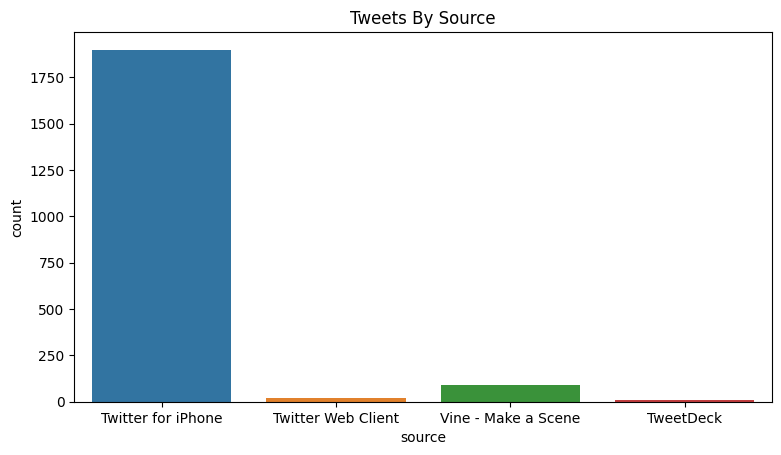

In [92]:
plt = sns.countplot(data=df, x='source')
plt.figure.set_figwidth(9)
plt.set_title('Tweets By Source')

---

### Account activity over time

Text(0.5, 1.0, 'Account Activity Over Time')

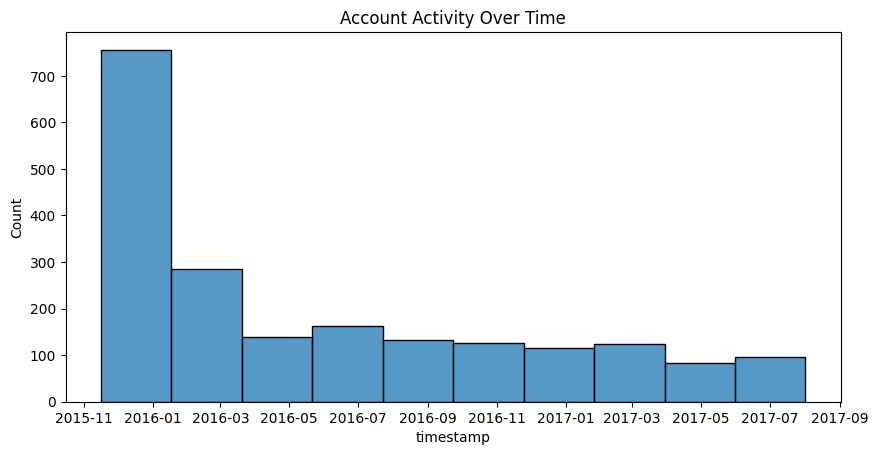

In [93]:
plt = sns.histplot(data=df, x='timestamp', bins=10)
plt.figure.set_figwidth(10)
plt.set_title('Account Activity Over Time')

---

In [94]:
def normalize(ser: pd.Series) -> pd.Series:
    data = dict(ser)  # convert series to dict as we cannot append values to a series
    for i in range(24):
        if i not in data:
            data[i] = np.nan

    return pd.Series(data)

In [95]:
col = df.timestamp.dt.tz_convert('EST')
col

tweet_id
892420643555336193   2017-08-01 11:23:56-05:00
892177421306343426   2017-07-31 19:17:27-05:00
891815181378084864   2017-07-30 19:18:03-05:00
891689557279858688   2017-07-30 10:58:51-05:00
891327558926688256   2017-07-29 11:00:24-05:00
                                ...           
666049248165822465   2015-11-15 19:24:50-05:00
666044226329800704   2015-11-15 19:04:52-05:00
666033412701032449   2015-11-15 18:21:54-05:00
666029285002620928   2015-11-15 18:05:30-05:00
666020888022790149   2015-11-15 17:32:08-05:00
Name: timestamp, Length: 2022, dtype: datetime64[ns, EST]

In [96]:
ser = col.dt.hour.value_counts()
ser

20    283
19    250
21    213
11    191
22    172
12    161
18    114
13    102
23     97
10     91
14     84
15     83
17     72
16     69
0      27
9       8
1       3
8       2
Name: timestamp, dtype: int64

[Text(0.5, 1.0, 'Tweets By Hour'), Text(0.5, 0, 'Hour'), Text(0, 0.5, 'Count')]

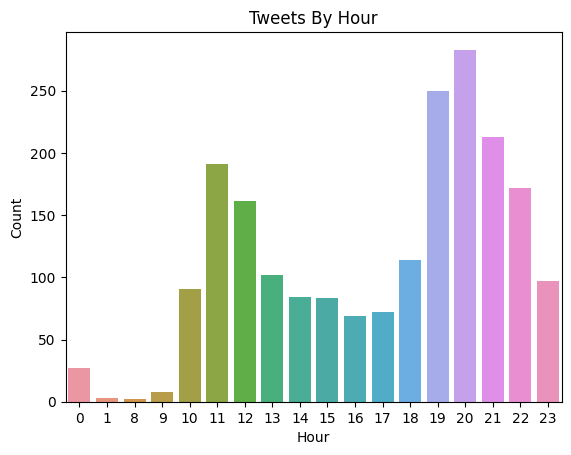

In [97]:
plt = sns.barplot(x=ser.index, y=ser.values)
plt.set(title='Tweets By Hour', xlabel='Hour', ylabel='Count')

[Text(0.5, 1.0, 'Tweets By Hour'), Text(0.5, 0, 'Hour'), Text(0, 0.5, 'Count')]

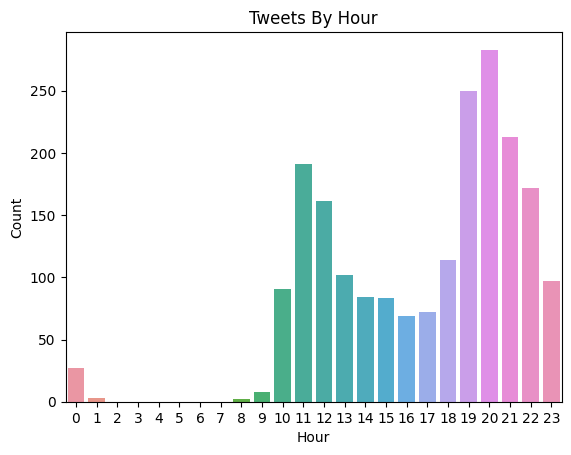

In [98]:
ser = normalize(ser)

plt = sns.barplot(x=ser.index, y=ser.values)
plt.set(title='Tweets By Hour', xlabel='Hour', ylabel='Count')

---

In [99]:
df.reset_index().set_index('timestamp').resample('Y').count()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,final_prediction,dog_type
timestamp,,,,,,,,,,,
2015-12-31 00:00:00+00:00,659,659,659,659,659,659,435,658,658,501,65
2016-12-31 00:00:00+00:00,1010,1010,1010,1010,1010,1010,748,1007,1007,811,192
2017-12-31 00:00:00+00:00,353,353,353,353,353,353,273,349,349,300,59


In [100]:
df.timestamp.dt.year.unique()

array([2017, 2016, 2015], dtype=int64)

## Amount of tweets by year

[Text(0.5, 1.0, 'Tweets By Year'), Text(0.5, 0, 'Year'), Text(0, 0.5, 'Count')]

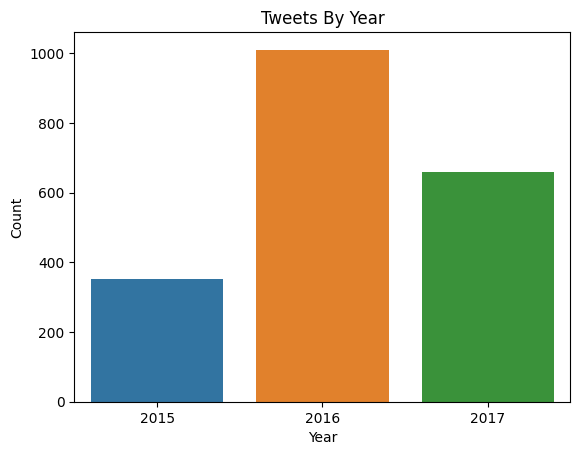

In [101]:
resampled_df = df.reset_index().set_index('timestamp').resample('Y').count()

plt = sns.barplot(x=df.timestamp.dt.year.unique(), y=resampled_df.tweet_id)
plt.set(title='Tweets By Year', xlabel='Year', ylabel='Count')

## Amount of words in tweet description

[Text(0.5, 1.0, 'Words Per Tweet'),
 Text(0.5, 0, 'Words'),
 Text(0, 0.5, 'Count')]

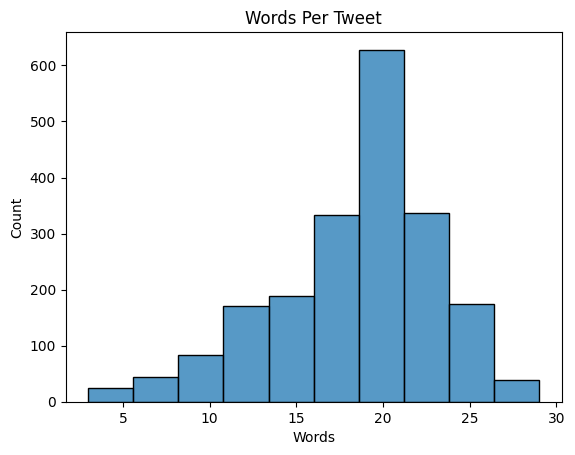

In [108]:
col = df.text.str.split().str.len()

plt = sns.histplot(x=col, bins=10)
plt.set(title='Words Per Tweet', xlabel='Words', ylabel='Count')